In [1]:
import sys
sys.path.append('../../')
import os
from tqdm import tqdm
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style='ticks', context='paper',
                               rc={'font.size': 6, 
                                   'axes.titlesize': 7,
                                   'axes.labelsize': 7,
                                   'axes.labelpad': 2,
                                   'xtick.labelsize': 5,
                                   'ytick.labelsize': 5,
                                   'legend.fontsize' : 5.5,
                                   'legend.markerscale': 0.5,
                                   'axes.spines.top': False,
                                   'axes.spines.right': False,
                                   'axes.linewidth': 0.4,
                                   'xtick.major.width': 0.4,
                                   'ytick.major.width': 0.4,
                                   'xtick.major.size': 2.5,
                                   'ytick.major.size': 2.5,
                                   'xtick.minor.size': 1.5,
                                   'ytick.minor.size': 1.5,
                                   'xtick.minor.width': 0.2,
                                   'ytick.minor.width': 0.2,
                                   'figure.constrained_layout.use': True,
                                   'figure.dpi': 200})
from matplotlib import pyplot as plt
from theory_simulation.effective_dimensionality import EDSimulation

In [109]:
sim = EDSimulation(ambient=100, resolution=0.1)
n_repeats = 50

# Base simulation
if os.path.exists('data/base_simulations.csv'):
    data_base = pd.read_csv('data/base_simulations.csv')
else:
    sim.make_nat_manifold(ed=20)
    sim.make_eco_manifold(ed=10, alignment='nat', alignment_strength=0.75)
    sim.make_data_manifold(ed=sim.ambient)

    data_base = []

    for model_ed in tqdm(np.logspace(np.log10(1.01), np.log10(100), num=20)):
        sim.make_model_manifold(ed=model_ed, alignment='nat', alignment_strength=0.75)

        for _ in range(n_repeats):
            sim.sample()
            data_base.append(sim.encoding_performance())

    data_base = pd.DataFrame(data_base)
    data_base.to_csv('data/base_simulations.csv', index=False)

# Counterexamples simulation
if os.path.exists('data/counterexamples_simulations.csv'):
    data_counter = pd.read_csv('data/counterexamples_simulations.csv')
else:
    sim.make_nat_manifold(ed=2)
    sim.make_eco_manifold(ed=2, alignment='nat', alignment_strength=1)
    sim.make_data_manifold(ed=sim.ambient)

    data_counter = []

    model_ed_range = (3, 5)
    for _ in tqdm(range(n_repeats)):
        model_ed = np.random.uniform(*model_ed_range)
        sim.make_model_manifold(ed=model_ed, alignment='nat', alignment_strength=1)
        sim.sample()
        sample = sim.encoding_performance()
        sample['alignment'] = 'high'
        data_counter.append(sample)

    model_ed_range = (15, 20)
    for _ in tqdm(range(n_repeats)):
        model_ed = np.random.uniform(*model_ed_range)
        sim.make_model_manifold(ed=model_ed, alignment='nat', alignment_strength=-1)
        sim.sample()
        sample = sim.encoding_performance()
        sample['alignment'] = 'low'
        data_counter.append(sample)

    data_counter = pd.DataFrame(data_counter)
    data_counter.to_csv('data/counterexamples_simulations.csv', index=False)

# Varying ecological ED
if os.path.exists('data/eco_simulations.csv'):
    data_eco = pd.read_csv('data/eco_simulations.csv')
else:
    sim.make_nat_manifold(ed=5)
    
    data_eco = []

    for eco_ed in tqdm([5, 30, 100]):
        sim.make_eco_manifold(ed=eco_ed, alignment='nat', alignment_strength=0.75)
        sim.make_data_manifold(ed=sim.ambient)

        for model_ed in np.logspace(np.log10(1.01), np.log10(100), num=20):
            sim.make_model_manifold(ed=model_ed, alignment='nat', alignment_strength=0.75)

            for _ in range(n_repeats):
                sim.sample()
                data_eco.append(sim.encoding_performance())

    data_eco = pd.DataFrame(data_eco)
    data_eco.to_csv('data/eco_simulations.csv', index=False)

# Varying experimental ED
if os.path.exists('data/exp_simulations.csv'):
    data_exp = pd.read_csv('data/exp_simulations.csv')
else:
    sim.make_nat_manifold(ed=20)
    sim.make_eco_manifold(ed=10, alignment='nat', alignment_strength=0.75)
    
    data_exp = []

    for exp_ed in tqdm([5, 30, 100]):
        sim.make_data_manifold(ed=exp_ed, alignment='nat', alignment_strength=0.75)

        for model_ed in np.logspace(np.log10(1.01), np.log10(100), num=20):
            sim.make_model_manifold(ed=model_ed, alignment='nat', alignment_strength=0.75)

            for _ in range(n_repeats):
                sim.sample()
                data_exp.append(sim.encoding_performance())

    data_exp = pd.DataFrame(data_exp)
    data_exp.to_csv('data/exp_simulations.csv', index=False)

# Varying alignment strength
if os.path.exists('data/alignment_simulations.csv'):
    data_align = pd.read_csv('data/alignment_simulations.csv')
else:
    sim.make_nat_manifold(ed=20)
    
    data_align = []

    for alignment_strength in tqdm([0, 0.5, 1]):
        sim.make_eco_manifold(ed=10, alignment='nat', alignment_strength=alignment_strength)
        sim.make_data_manifold(ed=sim.ambient)

        for model_ed in np.logspace(np.log10(1.01), np.log10(100), num=20):
            sim.make_model_manifold(ed=model_ed, alignment='nat', alignment_strength=alignment_strength)

            for _ in range(n_repeats):
                sim.sample()
                data_align.append(sim.encoding_performance())

    data_align = pd.DataFrame(data_align)
    data_align.to_csv('data/alignment_simulations.csv', index=False)

# Varying noise level
if os.path.exists('data/noise_simulations.csv'):
    data_noise = pd.read_csv('data/noise_simulations.csv')
else:
    old_res = sim.resolution
    sim.make_nat_manifold(ed=2)
    sim.make_eco_manifold(ed=2, alignment='nat', alignment_strength=0.75)
    sim.make_data_manifold(ed=sim.ambient)
    
    data_noise = []

    for res in tqdm([0, 0.1, 0.2]):
        sim.resolution = res

        for model_ed in np.logspace(np.log10(1.01), np.log10(100), num=20):
            sim.make_model_manifold(ed=model_ed, alignment='nat', alignment_strength=0.75)

            for _ in range(n_repeats):
                sim.sample()
                data_noise.append(sim.encoding_performance())

    data_noise = pd.DataFrame(data_noise)
    data_noise.to_csv('data/noise_simulations.csv', index=False)
    sim.resolution = old_res

100%|██████████| 3/3 [12:03<00:00, 241.26s/it]


---
# Effect of model ED

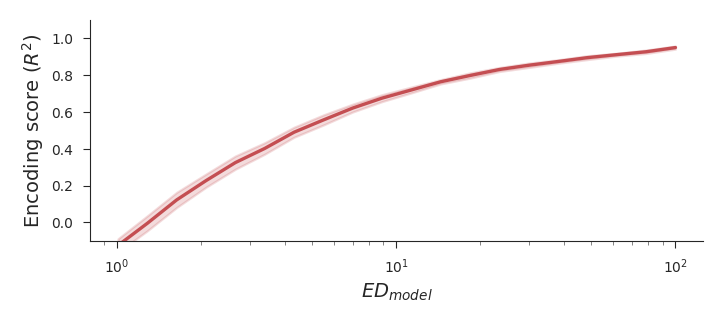

In [106]:
fig, ax = plt.subplots(figsize=(3.5, 1.5))

# ax.axvline(10, linestyle='--', color='black', alpha=0.3)
sns.lineplot(data=data_base, x='model_ed', y='r2_ceiled',
             ci='sd', color=sns.color_palette()[3], ax=ax)

ax.set(xlabel=r'$ED_{model}$', ylabel=r'Encoding score ($R^2$)', ylim=(-0.1, 1.1), xscale='log')
# ax.text(0.95, 0.12,
#         r'$D_{ecological} = 8$' + '\n' +
#         r'$ED_{ecological} = 8$' + '\n' +
#         r'$D_{experimental} = 3$',
#         ha='right', transform=ax.transAxes)

plt.savefig('saved/simulations_ED-model.png', dpi=300)
plt.show()

---
# Counterexample

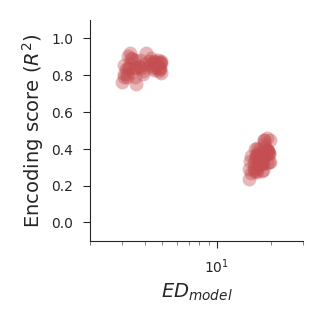

In [108]:
fig, ax = plt.subplots(figsize=(1.5, 1.5))

sns.scatterplot(data=data_counter, x='model_ed', y='r2_ceiled', 
                linewidth=0, s=25, color=sns.color_palette()[3], alpha=0.4, ax=ax)

ax.set(xlabel=r'$ED_{model}$', ylabel=r'Encoding score ($R^2$)', ylim=(-0.1, 1.1), xlim=(2, 30), xscale='log')

plt.savefig('saved/simulations_counterexample.png', dpi=300)
plt.show()

---
# Varying ecological and experimental ED

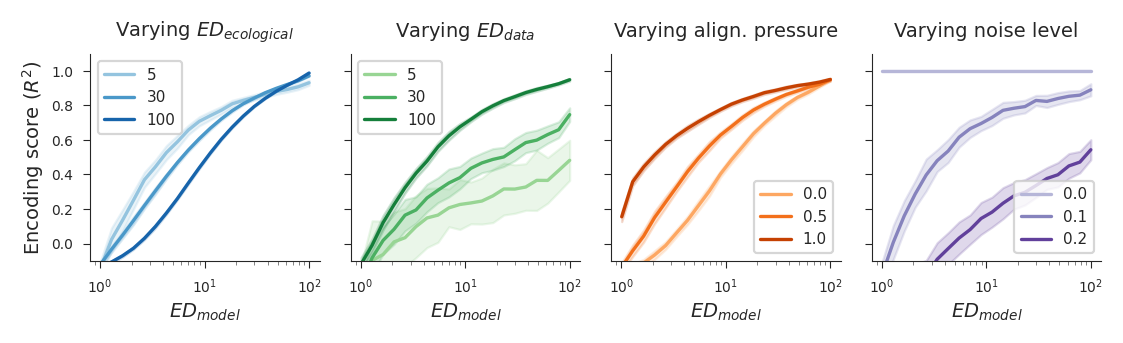

In [118]:
fig, axs = plt.subplots(1, 4, figsize=(5.5, 1.6))

sns.lineplot(data=data_eco, x='model_ed', y='r2_ceiled', hue='eco_ed',
             ci='sd', palette=sns.color_palette('Blues', 4)[1:], ax=axs[0])
axs[0].legend()

sns.lineplot(data=data_exp, x='model_ed', y='r2_ceiled', hue='data_ed',
             ci='sd', palette=sns.color_palette('Greens', 4)[1:], ax=axs[1])
axs[1].legend()

sns.lineplot(data=data_align, x='model_ed', y='r2_ceiled', hue='model_alignment_strength',
             ci='sd', palette=sns.color_palette('Oranges', 4)[1:], ax=axs[2])
axs[2].legend()

sns.lineplot(data=data_noise, x='model_ed', y='r2_ceiled', hue='resolution',
             ci='sd', palette=sns.color_palette('Purples', 4)[1:], ax=axs[3])
axs[3].legend()

axs[0].set(title=r'Varying $ED_{ecological}$', xlabel=r'$ED_{model}$', ylabel=r'Encoding score ($R^2$)', ylim=(-0.1, 1.1), xscale='log')
axs[1].set(title=r'Varying $ED_{data}$', xlabel=r'$ED_{model}$', ylabel=None, ylim=(-0.1, 1.1), xscale='log')
axs[1].axes.yaxis.set_ticklabels([])
axs[2].set(title=r'Varying align. pressure', xlabel=r'$ED_{model}$', ylabel=None, ylim=(-0.1, 1.1), xscale='log')
axs[2].axes.yaxis.set_ticklabels([])
axs[3].set(title=r'Varying noise level', xlabel=r'$ED_{model}$', ylabel=None, ylim=(-0.1, 1.1), xscale='log')
axs[3].axes.yaxis.set_ticklabels([])

plt.savefig('saved/simulations-sweep.png', dpi=300)
plt.show()